In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

%matplotlib inline
pd.options.display.max_rows = 1000

In [2]:
ldf = pd.read_csv('./train_test_result/train.csv')

In [3]:
ldf.head()

,Unnamed: 0,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Num_of_Borrowers,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,Male,No,0,Graduate,No,5849,0.0,1,149.297043,360.0,1.0,Urban,Y
1,1,Male,Yes,1,Graduate,No,4583,1508.0,2,128.000000,360.0,1.0,Rural,N
2,2,Male,Yes,0,Graduate,Yes,3000,0.0,1,66.000000,360.0,1.0,Urban,Y
3,3,Male,Yes,0,Not Graduate,No,2583,2358.0,2,120.000000,360.0,1.0,Urban,Y
4,4,Male,No,0,Graduate,No,6000,0.0,1,141.000000,360.0,1.0,Urban,Y


In [4]:
ldf.drop(['Unnamed: 0'], axis=1, inplace=True)
ldf.iloc[:, [5,6,7,8,9,10]] = ldf.iloc[:, [5,6,7,8,9,10]].astype('int64')

In [5]:
ldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Gender             614 non-null    object
 1   Married            614 non-null    object
 2   Dependents         614 non-null    object
 3   Education          614 non-null    object
 4   Self_Employed      614 non-null    object
 5   ApplicantIncome    614 non-null    int64 
 6   CoapplicantIncome  614 non-null    int64 
 7   Num_of_Borrowers   614 non-null    int64 
 8   LoanAmount         614 non-null    int64 
 9   Loan_Amount_Term   614 non-null    int64 
 10  Credit_History     614 non-null    int64 
 11  Property_Area      614 non-null    object
 12  Loan_Status        614 non-null    object
dtypes: int64(6), object(7)
memory usage: 62.5+ KB


In [6]:
ldf.describe()

,ApplicantIncome,CoapplicantIncome,Num_of_Borrowers,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.00000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.24430,1.555375,146.151466,336.508143,0.855049
std,6109.041673,2926.24876,0.497329,84.092865,74.842580,0.352339
min,150.000000,0.00000,1.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.00000,1.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.50000,2.000000,128.000000,360.000000,1.000000
75%,5795.000000,2297.25000,2.000000,164.750000,360.000000,1.000000
max,81000.000000,41667.00000,2.000000,700.000000,480.000000,1.000000


### Distplots

Text(0.5, 1.0, 'Loan Status: Y (Loan Amount Term)')

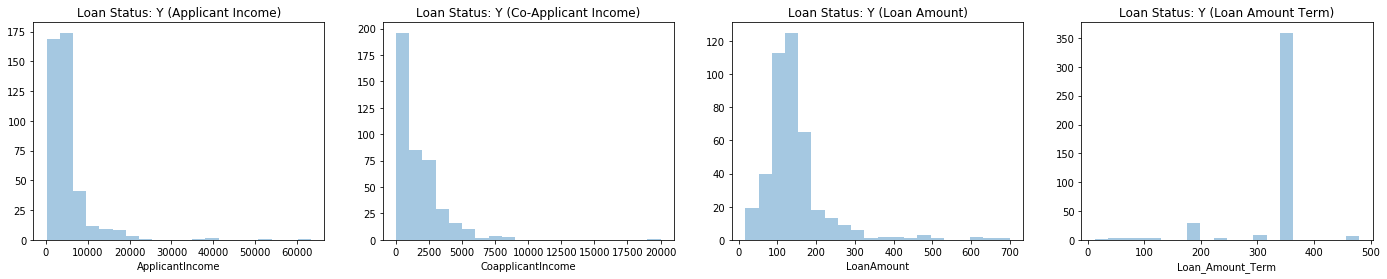

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=4,figsize=(24, 4))

ax = sns.distplot(ldf[ldf['Loan_Status']=='Y'].ApplicantIncome, bins = 20, ax = axes[0], kde = False)
ax.set_title('Loan Status: Y (Applicant Income)')
ax = sns.distplot(ldf[ldf['Loan_Status']=='Y'].CoapplicantIncome, bins = 20, ax = axes[1], kde = False)
ax.set_title('Loan Status: Y (Co-Applicant Income)')
ax = sns.distplot(ldf[ldf['Loan_Status']=='Y'].LoanAmount, bins = 20, ax = axes[2], kde = False)
ax.set_title('Loan Status: Y (Loan Amount)')
ax = sns.distplot(ldf[ldf['Loan_Status']=='Y'].Loan_Amount_Term, bins = 20, ax = axes[3], kde = False)
ax.set_title('Loan Status: Y (Loan Amount Term)')

Text(0.5, 1.0, 'Loan Status: N (Loan Amount Term)')

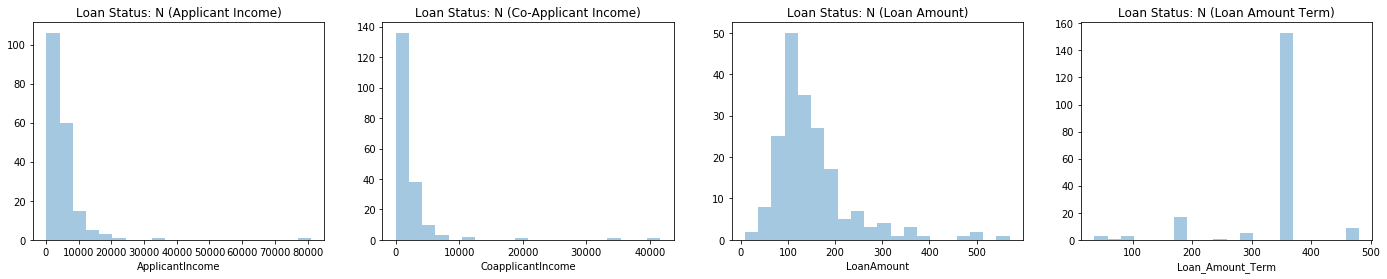

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=4,figsize=(24, 4))

ax = sns.distplot(ldf[ldf['Loan_Status']=='N'].ApplicantIncome, bins = 20, ax = axes[0], kde = False)
ax.set_title('Loan Status: N (Applicant Income)')
ax = sns.distplot(ldf[ldf['Loan_Status']=='N'].CoapplicantIncome, bins = 20, ax = axes[1], kde = False)
ax.set_title('Loan Status: N (Co-Applicant Income)')
ax = sns.distplot(ldf[ldf['Loan_Status']=='N'].LoanAmount, bins = 20, ax = axes[2], kde = False)
ax.set_title('Loan Status: N (Loan Amount)')
ax = sns.distplot(ldf[ldf['Loan_Status']=='N'].Loan_Amount_Term, bins = 20, ax = axes[3], kde = False)
ax.set_title('Loan Status: N (Loan Amount Term)')

### Applicant and Co-applicant Income coordinates for each Loan Status

Text(0.5, 1, 'Income coordinates')

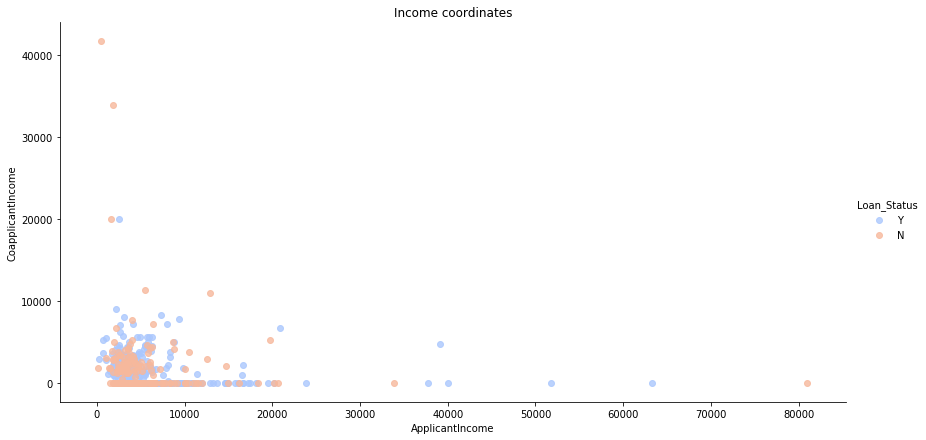

In [9]:
sns.lmplot(x='ApplicantIncome', y='CoapplicantIncome', data=ldf, hue='Loan_Status', fit_reg=False, palette='coolwarm', height=6, aspect=2)
plt.title('Income coordinates')

### Heatmap correlation between the numrical data

Text(0.5, 1, 'Loan Rejected')

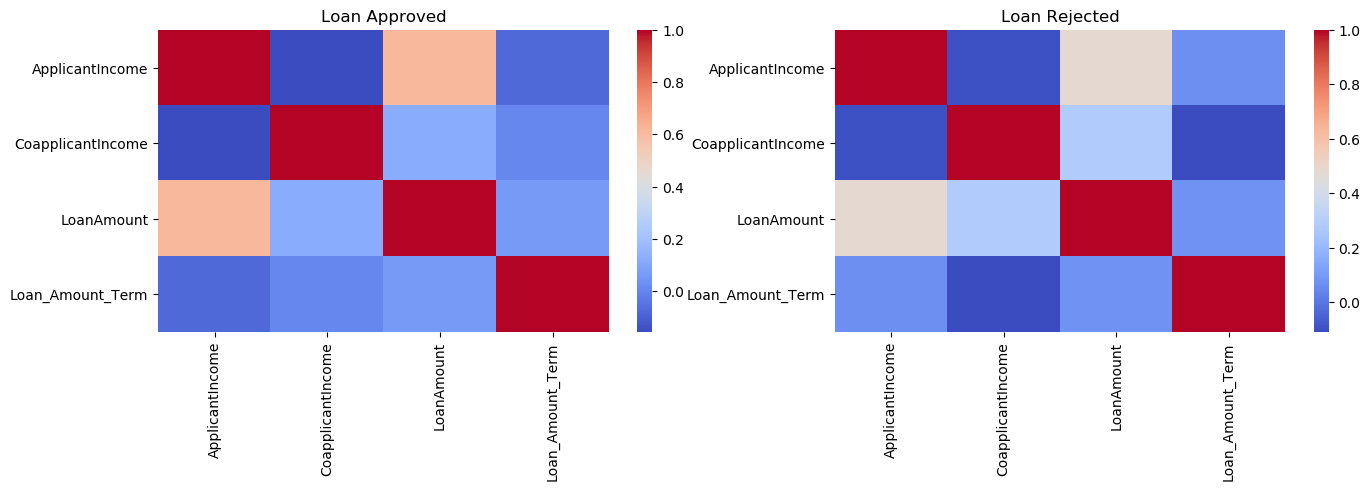

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(16, 4))
fig.set_dpi(100)
ax = sns.heatmap(ldf[ldf['Loan_Status']=='Y'][['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']].corr(),
                 ax = axes[0], cmap='coolwarm')
ax.set_title('Loan Approved')
ax = sns.heatmap(ldf[ldf['Loan_Status']=='N'][['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']].corr(),
                 ax = axes[1], cmap='coolwarm')
ax.set_title('Loan Rejected')

### Creating a new dataframe without outliers

In [11]:
df = ldf[(ldf['ApplicantIncome']<=10172) & (ldf['CoapplicantIncome']<=5743) & (ldf['LoanAmount']<=262)]
print(len(ldf))
print(len(df))

614
535


### Importing packages

In [12]:
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder,LabelEncoder, Normalizer
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score

### Setting X features and y label

In [13]:
X = df.iloc[:, :-1].values
y= df.iloc[:, -1].values

### Encoding the independent categorical features

In [14]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0,1,2,3,4,10,11])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

### Encoding the dependent variable

In [15]:
le = LabelEncoder()
y = le.fit_transform(y)

### Train, Test split

In [16]:
X_train, X_test,  y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Feature scaling using normilization

In [17]:
nc = Normalizer()
X_train[:, 17:22] = nc.fit_transform(X_train[:, 17:22])
X_test[:, 17:22] = nc.transform(X_test[:, 17:22])

### Dimension reduction using principle component analysis (PCA)

In [18]:
pca = PCA(n_components=2)
train_comp = pca.fit_transform(X_train[:, 17:22])
test_comp = pca.transform(X_test[:, 17:22])

train_comp= pd.DataFrame(train_comp)
train_comp.rename({0: 'PCA_1', 1: 'PCA_2'}, axis=1, inplace = True)

X_train = pd.concat((pd.DataFrame(X_train), train_comp), axis=1)

test_comp= pd.DataFrame(test_comp)
test_comp.rename({0: 'PCA_1', 1: 'PCA_2'}, axis=1, inplace = True)

X_test = pd.concat((pd.DataFrame(X_test), test_comp), axis=1)

In [19]:
X_train.drop([17,18,19,20,21], axis=1, inplace=True)
X_train=np.array(X_train)
X_test.drop([17,18,19,20,21], axis=1, inplace=True)
X_test=np.array(X_test)

In [20]:
print(X_train.shape)
print(X_test.shape)

(374, 19)
(161, 19)


### Model Training & Testing

#### Functions

In [21]:
def cross_score(model, idenpendent_feats, dependent_feat,scoring, cv):
    training_start = time.perf_counter()
    accuracy = np.mean(cross_val_score(model, X=idenpendent_feats, y=dependent_feat, scoring=scoring, cv=cv))
    training_end = time.perf_counter()
    train_time = training_end-training_start
    return accuracy, train_time

In [22]:
def best_hyper_params(model,idenpendent_feats, dependent_feat, params, scoring, cv):
    search = GridSearchCV(model, param_grid=params, scoring=scoring, cv=cv, n_jobs=-1)
    search_start = time.perf_counter()
    search.fit(idenpendent_feats, dependent_feat)
    search_end = time.perf_counter()
    best_find = search.best_estimator_
    best_score = search.best_score_
    search_time = search_end - search_start
    return best_find, best_score, search_time

In [23]:
def model_performance(model, test_features, test_label):
    y_pred = model.predict(test_features)
    conf_matrix = confusion_matrix(y_true=test_label, y_pred=y_pred)
    accuracy = accuracy_score(y_true=test_label, y_pred=y_pred)
    precision = precision_score(y_true=test_label, y_pred=y_pred)
    return conf_matrix, accuracy, precision

#### Model Building

##### RandomForest Classifier

In [24]:
rfc = RandomForestClassifier(random_state=1)

In [25]:
train_accuracy, train_time = cross_score(rfc, X_train, y_train, 'accuracy', 7)
print("Average score on training set: " + str(train_accuracy))
print("Time: " + str(train_time))

Average score on training set: 0.8045822102425876
Time: 2.1354328000000002


In [26]:
rfc_params = [{'n_estimators': range(50,250,100), 'max_depth': (4,7,10), 'min_samples_split': (2,4,6,8),
               'min_samples_leaf': (5,10,15,20), 'max_features': ('auto','log2'), 'ccp_alpha': (0.0, 0.005, 0.01)}]
rfc_best_params, rfc_best_score, search_time = best_hyper_params(rfc, X_train, y_train, rfc_params, 'accuracy', 3)
print("Best Random Forest params are: " , rfc_best_params)
print("Best Random Forest params score is: " + str(rfc_best_score))
print("Search time: " + str(search_time))

Best Random Forest params are:  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=7, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)
Best Random Forest params score is: 0.8208817204301075
Search time: 106.29580999999999


In [27]:
rfc_cm, rfc_pred_accuracy, rfc_precision = model_performance(rfc_best_params, X_test, y_test)
print(rfc_cm)
print("Random Forest prediction score: " + str(rfc_pred_accuracy))
print("Random Forest precision Score: " + str(rfc_precision))

[[ 25  26]
 [  0 110]]
Random Forest prediction score: 0.8385093167701864
Random Forest precision Score: 0.8088235294117647


##### XGBoost Classifier

In [28]:
xg = XGBClassifier(random_state=2)

In [29]:
train_accuracy, train_time = cross_score(xg, X_train, y_train, 'accuracy', 7)
print("Average score on training set: " + str(train_accuracy))
print("Time: " + str(train_time))

Average score on training set: 0.7806229410002995
Time: 0.6183769999999811


In [30]:
xg_params = [{'max_depth': range(3,12,3), 'learning_rate':(0.1,0.05,0.01,0.005), 'n_estimators':range(100,1000,100), 'gamma':(0,0.1,0.5,1),
              'reg_alpha':(0,0.01,0.005,0.001) }]
xg_best_params, xg_best_score, search_time = best_hyper_params(xg, X_train, y_train, xg_params, 'accuracy', 3)
print("Best XGBoost params are: " , xg_best_params)
print("Best XGBoost params score is: " + str(xg_best_score))
print("Search time: " + str(search_time))

Best XGBoost params are:  XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.5, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.005, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=300, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=2, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
Best XGBoost params score is: 0.8181505376344086
Search time: 422.59792460000006


In [31]:
xg_cm, xg_pred_accuracy, xg_precision = model_performance(xg_best_params, X_test, y_test)
print(xg_cm)
print("XGBoost prediction score: " + str(xg_pred_accuracy))
print("XGBoost precision Score: " + str(xg_precision))

[[ 27  24]
 [  3 107]]
XGBoost prediction score: 0.8322981366459627
XGBoost precision Score: 0.816793893129771


##### Support Vector Machine

In [32]:
svc = SVC(random_state=3)

In [33]:
train_accuracy, train_time = cross_score(svc, X_train, y_train, 'accuracy', 10)
print("Average score on training set: " + str(train_accuracy))
print("Time: " + str(train_time))

Average score on training set: 0.8154338549075391
Time: 0.062233799999944495


In [34]:
svc_params = [{'C':(0.1, 0.5, 1.0, 3.0, 6.0), 'kernel': ('poly', 'rbf', 'sigmoid'), 'degree':range(3,12,3), 'gamma':('scale', 'auto'), 'coef0':(0.0, 0.1, 0.5, 0.7)}]
svc_best_params, svc_best_score, search_time = best_hyper_params(svc, X_train, y_train, svc_params, 'accuracy', 3)
print("Best SVC params are: " , svc_best_params)
print("Best SVC params score is: " + str(svc_best_score))
print("Search time: " + str(search_time))

Best SVC params are:  SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=3, shrinking=True, tol=0.001,
    verbose=False)
Best SVC params score is: 0.8155483870967742
Search time: 1.1478886000001012


In [35]:
svc_cm, svc_pred_accuracy, svc_precision = model_performance(svc_best_params, X_test, y_test)
print(svc_cm)
print("SVC prediction score: " + str(svc_pred_accuracy))
print("SVC precision Score: " + str(svc_precision))

[[ 25  26]
 [  0 110]]
SVC prediction score: 0.8385093167701864
SVC precision Score: 0.8088235294117647


##### Logistic Regression

In [36]:
lrc = LogisticRegression(random_state=4)

In [37]:
train_accuracy, train_time = cross_score(lrc, X_train, y_train, 'accuracy', 10)
print("Average score on training set: " + str(train_accuracy))
print("Time: " + str(train_time))

Average score on training set: 0.8154338549075391
Time: 0.07092639999996209


In [39]:
lrc.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=4, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
lrc_cm, lrc_pred_accuracy, lrc_precision = model_performance(lrc, X_test, y_test)
print(lrc_cm)
print("Logistic Regression score: " + str(lrc_pred_accuracy))
print("Logistic Regression precision Score: " + str(lrc_precision))

[[ 25  26]
 [  0 110]]
Logistic Regression score: 0.8385093167701864
Logistic Regression precision Score: 0.8088235294117647
